In [73]:
# ref. http://freerangestats.info/blog/2019/04/20/yield-curve

In [74]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
# get historical daily price
df=pd.DataFrame()
# 30yr,10yr,3mnth treasury yield, spy index
for symbol in  ['^TYX','^TNX','^IRX','SPY']: 
    tick = yf.Ticker(symbol)
    history = tick.history(period="max")
    df[symbol] = history.Close
df= df.dropna()

In [76]:
df['price'] = df['SPY']
df['pct_chg'] = df.price.pct_change()
# log return computation
df['log_ret'] = np.log(df.price) - np.log(df.price.shift(1))
df['ret_mean'] = df.log_ret.rolling(21).mean()
# https://en.wikipedia.org/wiki/Volatility_(finance) "annualized vol" but looking back only 21 days
df['hist_volatility'] = df.log_ret.rolling(21).std()*np.sqrt(252)*100
df = df.dropna()

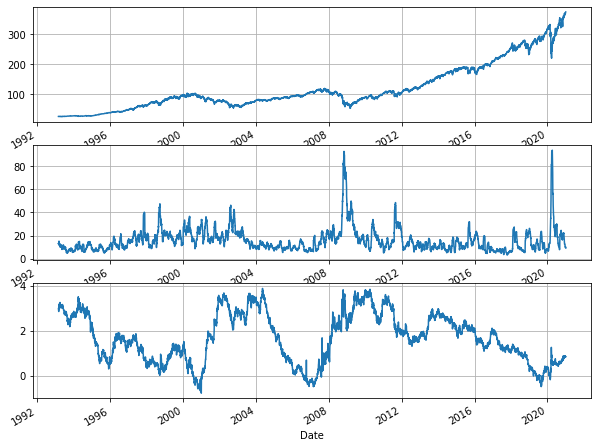

In [77]:
ind = -252*30
plt.figure(figsize=(10,8))
plt.subplot(311)
df['SPY'][ind:].plot()
plt.grid(True)
plt.subplot(312)
df['hist_volatility'][ind:].plot()
plt.grid(True)
plt.subplot(313)
(df['^TNX']-df['^IRX'])[ind:].plot()
plt.grid(True)

![title](http://freerangestats.info/img/0151-ft-timeseries.png)